# Distribution by XXX - Analytics

### Import Library

In [7]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [8]:
import os
from pathlib import Path
notebook_path = os.getcwd()
current_dir = Path(notebook_path)
csv_file = str(current_dir) + '/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [9]:
data = dataset.copy()

In [10]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,1812
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,1323
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,1207
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765
...,...,...,...,...,...
2025-02-14 14:15:00,1343.0,1343.0,1340.3,1341.3,7141
2025-02-14 14:20:00,1340.9,1341.9,1340.5,1341.4,4593
2025-02-14 14:25:00,1341.1,1342.5,1340.7,1342.5,4207


In [11]:
back_bar = 20
next_bar = back_bar -1
data['max_prev'] = data['High'].rolling(back_bar).max()
data['max_next'] = data['High'].shift(-next_bar).rolling(back_bar).max()
data['min_prev'] = data['Low'].rolling(back_bar).min()
data['min_next'] = data['Low'].shift(-next_bar).rolling(back_bar).min()

In [12]:
data.dropna(inplace=True)
data['peak_keylevel'] = data.apply(lambda r: True if (r['High'] == r['max_prev'] and r['High'] == r['max_next']) else False, axis=1)
data['valley_keylevel'] = data.apply(lambda r: True if (r['Low'] == r['min_prev'] and r['Low'] == r['min_next']) else False, axis=1)

In [16]:
data

,Open,High,Low,Close,Volume,max_prev,max_next,min_prev,min_next,peak_keylevel,valley_keylevel
Date,,,,,,,,,,,
2018-08-13 10:35:00,943.9,944.9,943.9,944.8,1101,946.4,948.9,942.3,942.3,False,False
2018-08-13 10:40:00,944.9,945.0,943.7,943.7,936,946.4,949.6,942.3,942.3,False,False
2018-08-13 10:45:00,943.5,943.5,942.9,943.5,1793,946.4,949.6,942.3,942.3,False,False
2018-08-13 10:50:00,943.6,943.8,942.3,943.2,1541,946.4,949.6,942.3,942.3,False,True
2018-08-13 10:55:00,943.2,944.1,942.7,943.7,1236,946.4,950.2,942.3,942.7,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-14 11:15:00,1347.4,1347.5,1346.5,1346.8,2592,1350.4,1347.5,1344.7,1340.3,False,False
2025-02-14 11:20:00,1346.8,1347.2,1346.0,1346.8,2874,1350.4,1347.2,1344.7,1340.3,False,False
2025-02-14 11:25:00,1346.8,1346.8,1346.0,1346.7,1725,1350.4,1346.8,1344.7,1340.3,False,False


## Analytics candlestick color

In [14]:
peak_keylevel_is_green = data[(data.peak_keylevel == True) & (data.Close > data.Open)]
peak_keylevel_is_red = data[(data.peak_keylevel == True) & (data.Close < data.Open)]
len_of_green = len(peak_keylevel_is_green)
len_of_red = len(peak_keylevel_is_red)
percent_of_green = len_of_green / (len_of_green + len_of_red)
percent_of_red = len_of_red / (len_of_green + len_of_red)
y = np.array([percent_of_green, percent_of_red])
labels = ["Green({})".format(percent_of_green), "Red({})".format(percent_of_red)]

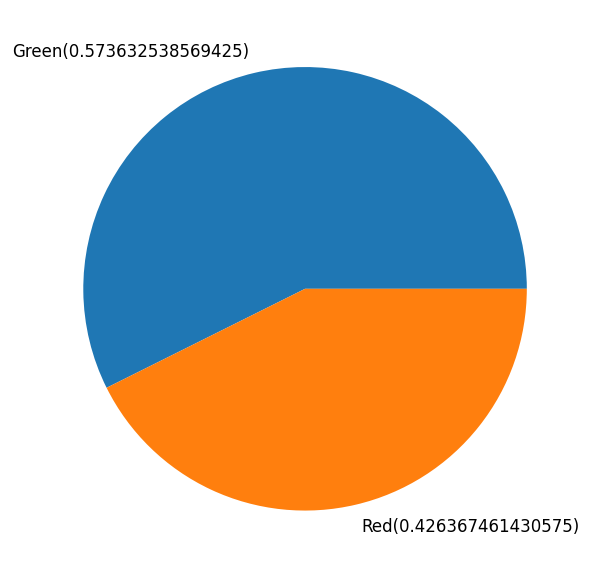

In [15]:
plt.pie(y, labels = labels)
plt.show()